In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("../Data/processed/fused_ppg_acc_features.csv")

print(df.shape)
df.head()


(1743, 25)


,subject_id,activity,hr_bpm,hrv,peak_count,ppg_mean,ppg_std,ppg_rms,ppg_spectral_energy,ppg_spectral_entropy,...,ax_rms,ay_rms,az_rms,sma,ax_dom_freq,ay_dom_freq,az_dom_freq,ax_spec_energy,ay_spec_energy,az_spec_energy
0,s12,run,99.709182,0.007644,9,-1.116858,68.371286,68.380407,1.168347e+07,1.845303,...,0.869656,0.957057,1.063297,2.305827,1.953125,1.953125,1.953125,0.195912,0.330808,0.359380
1,s12,run,100.190840,0.011256,8,2.855715,59.774673,59.842850,8.966132e+06,2.225075,...,0.956000,1.233972,1.229737,2.765251,1.953125,1.953125,1.953125,0.262989,0.738434,0.537484
2,s12,run,93.541203,0.036374,8,2.343746,59.500541,59.546683,8.871155e+06,1.778282,...,0.966029,1.294563,1.204810,2.774363,1.953125,1.953125,1.953125,0.227524,0.795345,0.462584
3,s12,run,86.248203,0.019813,7,-2.086325,58.417425,58.454669,8.546416e+06,1.426971,...,0.947252,1.383993,1.383435,2.935472,1.953125,1.953125,1.953125,0.232054,0.813218,0.595898
4,s12,run,85.836910,0.017000,7,-0.376455,58.327658,58.328873,8.499200e+06,1.274032,...,0.815462,1.360294,1.351097,2.800067,1.953125,1.953125,1.953125,0.196484,0.800993,0.559955


In [22]:
meta_cols = ["subject_id", "activity"]
feature_cols = [c for c in df.columns if c not in meta_cols]

X = df[feature_cols]
y_activity = df["activity"]


In [4]:
#variance analysis
variances = X.var().sort_values()
variances


hrv                     1.605674e-04
ax_spec_energy          3.608534e-02
az_spec_energy          1.021255e-01
ax_std                  2.224727e-01
ax_rms                  2.229068e-01
ppg_spectral_entropy    2.235800e-01
ay_spec_energy          2.651085e-01
az_std                  2.873127e-01
az_rms                  2.876881e-01
ay_std                  5.184290e-01
ay_rms                  5.190958e-01
peak_count              1.665922e+00
sma                     1.722499e+00
ppg_mean                4.529131e+00
R_ratio                 5.990506e+00
ax_dom_freq             4.301756e+01
ay_dom_freq             4.345714e+01
az_dom_freq             1.712878e+02
hr_bpm                  2.140375e+02
ppg_std                 6.914690e+02
ppg_rms                 6.918756e+02
window_id               2.533160e+05
ppg_spectral_energy     4.614900e+13
dtype: float64

In [6]:
VAR_THRESHOLD = 0.001
high_var_features = variances[variances > VAR_THRESHOLD].index.tolist()

len(high_var_features), high_var_features



(22,
 ['ax_spec_energy',
  'az_spec_energy',
  'ax_std',
  'ax_rms',
  'ppg_spectral_entropy',
  'ay_spec_energy',
  'az_std',
  'az_rms',
  'ay_std',
  'ay_rms',
  'peak_count',
  'sma',
  'ppg_mean',
  'R_ratio',
  'ax_dom_freq',
  'ay_dom_freq',
  'az_dom_freq',
  'hr_bpm',
  'ppg_std',
  'ppg_rms',
  'window_id',
  'ppg_spectral_energy'])

In [7]:
X_var = X[high_var_features]
X_var.shape


(1743, 22)

In [8]:
corr = X_var.corr()
corr


,ax_spec_energy,az_spec_energy,ax_std,ax_rms,ppg_spectral_entropy,ay_spec_energy,az_std,az_rms,ay_std,ay_rms,...,ppg_mean,R_ratio,ax_dom_freq,ay_dom_freq,az_dom_freq,hr_bpm,ppg_std,ppg_rms,window_id,ppg_spectral_energy
ax_spec_energy,1.000000,0.871149,0.873714,0.873556,0.107225,0.749300,0.814211,0.814099,0.742527,0.742471,...,0.006648,-0.077112,-0.442085,-0.509104,-0.464527,0.026424,-0.087059,-0.087198,-0.127478,-0.082860
az_spec_energy,0.871149,1.000000,0.788340,0.788268,0.208285,0.595458,0.871149,0.870971,0.620332,0.620309,...,0.015101,-0.053094,-0.442128,-0.501552,-0.470599,-0.010579,-0.165633,-0.165704,-0.229872,-0.147033
ax_std,0.873714,0.788340,1.000000,0.999998,0.231415,0.686463,0.927027,0.927025,0.831528,0.831521,...,0.002417,-0.060091,-0.627115,-0.725731,-0.661675,0.282030,-0.049982,-0.050160,-0.159113,-0.047024
ax_rms,0.873556,0.788268,0.999998,1.000000,0.231651,0.686305,0.927041,0.927040,0.831451,0.831445,...,0.002426,-0.060010,-0.627160,-0.725772,-0.661726,0.282110,-0.050113,-0.050291,-0.159187,-0.047140
ppg_spectral_entropy,0.107225,0.208285,0.231415,0.231651,1.000000,-0.170308,0.283796,0.283833,-0.029263,-0.029283,...,0.039864,0.025281,-0.187015,-0.209768,-0.179160,0.155746,-0.464305,-0.463793,-0.047148,-0.428198
ay_spec_energy,0.749300,0.595458,0.686463,0.686305,-0.170308,1.000000,0.636890,0.636813,0.909889,0.909801,...,-0.008889,-0.076557,-0.389643,-0.461508,-0.396503,0.129293,0.163042,0.162779,-0.074375,0.124508
az_std,0.814211,0.871149,0.927027,0.927041,0.283796,0.636890,1.000000,0.999998,0.796134,0.796144,...,0.007272,-0.046977,-0.650374,-0.749929,-0.691651,0.254742,-0.107060,-0.107227,-0.186114,-0.102866
az_rms,0.814099,0.870971,0.927025,0.927040,0.283833,0.636813,0.999998,1.000000,0.796171,0.796182,...,0.007275,-0.046949,-0.650489,-0.750071,-0.691778,0.254992,-0.107016,-0.107182,-0.185882,-0.102822
ay_std,0.742527,0.620332,0.831528,0.831451,-0.029263,0.909889,0.796134,0.796171,1.000000,0.999999,...,-0.002655,-0.061271,-0.576419,-0.678387,-0.597851,0.351667,0.173513,0.173218,-0.037653,0.134883
ay_rms,0.742471,0.620309,0.831521,0.831445,-0.029283,0.909801,0.796144,0.796182,0.999999,1.000000,...,-0.002680,-0.061216,-0.576464,-0.678449,-0.597899,0.351799,0.173585,0.173290,-0.037667,0.134937


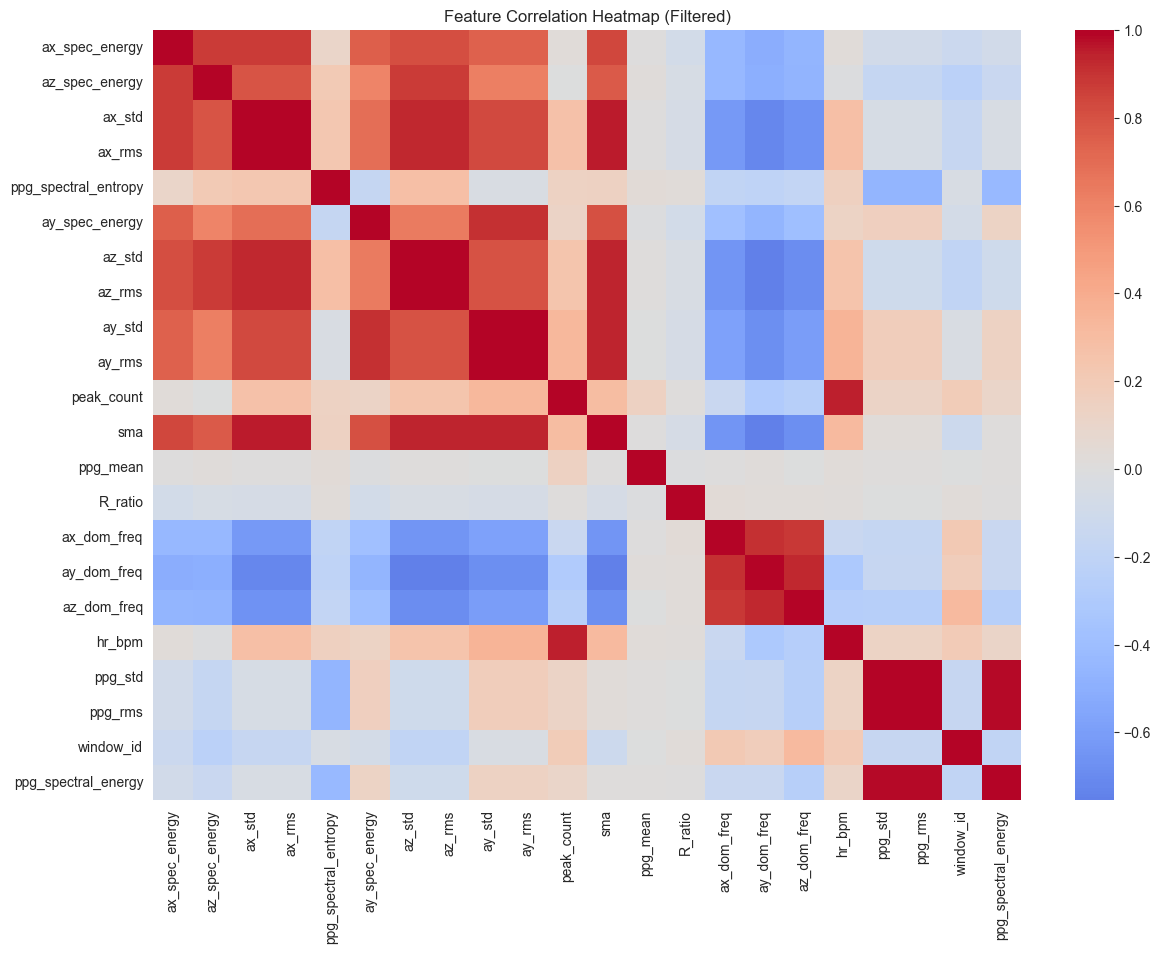

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap (Filtered)")
plt.show()


In [18]:
CORR_THRESHOLD = 0.9

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [
    column for column in upper.columns
    if any(upper[column] > CORR_THRESHOLD)
]

to_drop


['ax_rms',
 'az_std',
 'az_rms',
 'ay_std',
 'ay_rms',
 'sma',
 'ay_dom_freq',
 'az_dom_freq',
 'hr_bpm',
 'ppg_rms',
 'ppg_spectral_energy']

In [19]:
selected_features = [f for f in X_var.columns if f not in to_drop]

X_selected = X_var[selected_features]
X_selected.shape


(1743, 11)

In [12]:
final_df = pd.concat([df[meta_cols], X_selected], axis=1)

OUTPUT_PATH = "../Data/processed/selected_features.csv"
final_df.to_csv(OUTPUT_PATH, index=False)

print("Selected feature dataset saved.")


Selected feature dataset saved.


In [13]:
final_df.columns

Index(['subject_id', 'activity', 'ax_spec_energy', 'az_spec_energy', 'ax_std',
       'ppg_spectral_entropy', 'ay_spec_energy', 'peak_count', 'ppg_mean',
       'R_ratio', 'ax_dom_freq', 'ppg_std', 'window_id'],
      dtype='object')